In [36]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #from model_selection instead of cross_validation
from sklearn.model_selection import validation_curve #from model_selection instead of learning_curve
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
print (help(learning_curve))

Help on function learning_curve in module sklearn.learning_curve:

learning_curve(estimator, X, y, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch='all', verbose=0, error_score='raise')
    Learning curve.
    
    .. deprecated:: 0.18
        This module will be removed in 0.20.
        Use :func:`sklearn.model_selection.learning_curve` instead.
    
    Determines cross-validated training and test scores for different training
    set sizes.
    
    A cross-validation generator splits the whole dataset k times in training
    and test data. Subsets of the training set with varying sizes will be used
    to train the estimator and a score for each training subset size and the
    test set will be computed. Afterwards, the scores will be averaged over
    all k runs for each training subset size.
    
    Read more in the :ref:`User Guide <learning_curves>`.
    
    Parameters
    ---------

In [37]:
np.random.seed(42)

# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

data and DecisionTreeClassifier import

In [38]:
iris = load_iris()
X = iris.data
y = iris.target
#shuffle data
X, y = shuffle(X, y, random_state=23)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# DecisionTreeClassifier

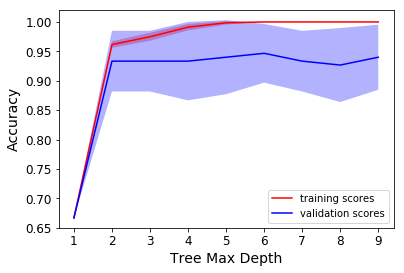

In [39]:
depths = np.arange(1, 10)
val_train, val_test = validation_curve(DecisionTreeClassifier(), X, y,
                                       'max_depth', depths, cv=10)
def plot_with_depth(depths, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(depths, mu, '-', **kwargs)
    plt.fill_between(depths, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

plot_with_depth(depths, val_train, label='training scores', color = 'r')
plot_with_depth(depths, val_test, label='validation scores', color = 'b')
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

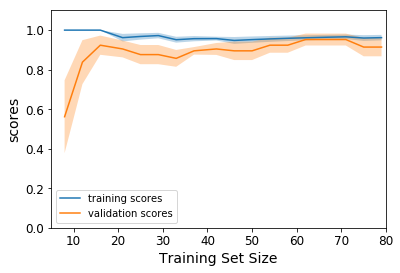

In [40]:
def plot_with_size(sizes, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=3),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

In [96]:
# def plot_learning_curve():
#     train_sizes = np.linspace(0.05, 1, 20)
#     N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=2),
#                                                   X, y, train_sizes, cv=7)
#     plot_with_size(N_train, val_train, label='training scores')
#     plot_with_size(N_train, val_test, label='validation scores')
#     plt.xlabel('Training Set Size'); plt.ylabel('scores')
#     plt.ylim(0, 1.1)
#     #plt.xlim(5, 80)
#     plt.legend()
    
# plot_learning_curve()

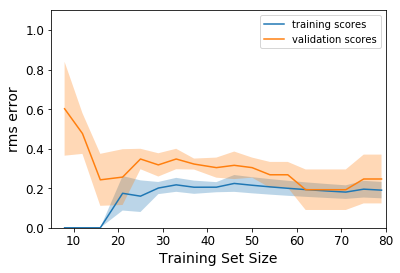

In [42]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

# degree = np.arange(0, 18)
# val_train, val_test = validation_curve(DecisionTreeClassifier(max_depth=2), X_train, y_train,
#                                        'max_depth', depths, cv=10,
#                                        scoring=rms_error)

def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=3),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5, 
                                                 scoring=rms_error)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# MLPClassifier

In [45]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(5, 5), random_state=1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

1.0

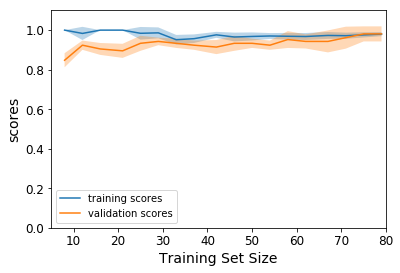

In [47]:
def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(5, 5), random_state=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# AdaBoostClassifier

In [48]:
bdt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")
bdt_clf.fit(X_train, y_train)
bdt_clf.score(X_test, y_test)

1.0

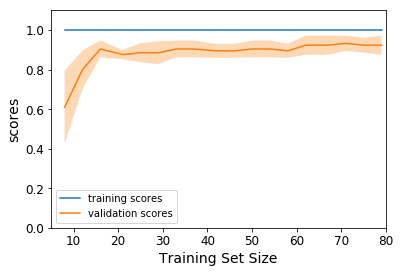

In [50]:
def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                                                     n_estimators=600,learning_rate=1.5,algorithm="SAMME"),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# SVC

In [108]:
svm_clf = SVC(kernel='linear', C=1E10)
svm_clf.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
# svm_clf = SVC(kernel='linear', C=1E10)
svm_clf = SVC(kernel='linear', C=1E10)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9555555555555556

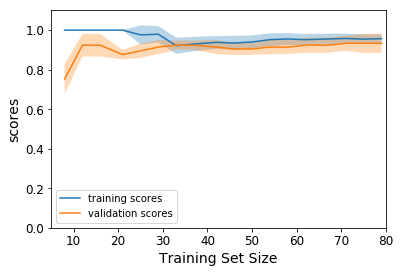

In [44]:
def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(SVC(kernel= 'linear', C=1E10),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# KNN

In [51]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

1.0

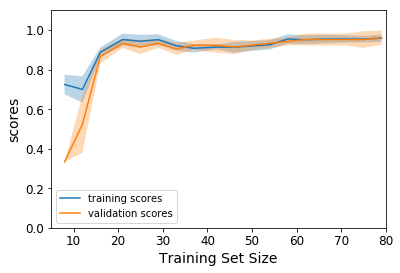

In [53]:

def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(KNeighborsClassifier(),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()